# House Style Image Classification Using Fastai

## Task

Classify images of different architectural styles of houses. This is a classification that is present mostly in the US housing market. The architectural styles are characterized by distinct features and structure, making them historically identifiable.  

This dataset includes the following 5 types of houses:
- victorian
- tudor 
- colonial
- greek revival 
- ranch style

The images are downloaded from Google Images. 

## Execution

In [18]:
# Import needed libraries and modules

import os
from fastai.vision.all import *
from fastai.metrics import accuracy 

In [6]:
# Verify that no corrupt images are included in the datasets

path = 'houses'
for folder in ('victorian', 'tudor', 'colonial', 'greek revival', 'ranch'):
    print(folder)
    verify_images(os.path.join(path, folder))

victorian
tudor
colonial
greek revival
ranch


In [32]:
# Transform items and split data

item_tfms = [Resize((224, 224), method='squish')]
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=item_tfms, num_workers=0)

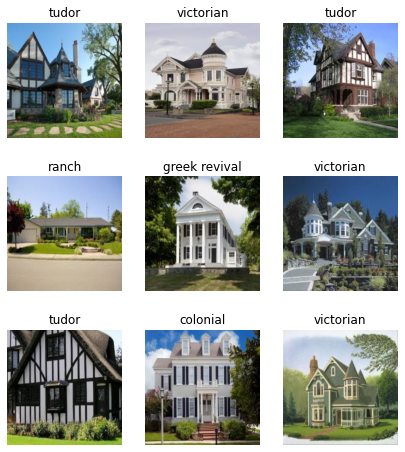

In [38]:
# Preview batch items

data.show_batch(figsize=(7, 8))

In [34]:
# Instantiate a learner using the resnet18 architecture and the accuracy metric to test performance

learn = cnn_learner(data, resnet18, metrics=accuracy)

In [36]:
# Fit learner to data

defaults.device = torch.device('cuda')
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.608906,3.059854,0.322581,00:31
1,2.474812,2.475054,0.322581,00:27
2,2.235267,2.113495,0.322581,00:24


SuggestedLRs(lr_min=0.002290867641568184, lr_steep=6.30957365501672e-05)

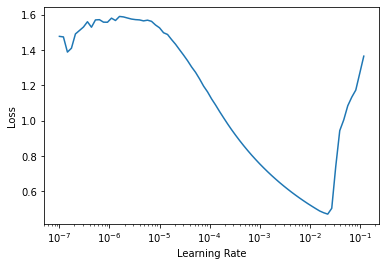

In [37]:
# Find optimal learning rate

learn.unfreeze()
learn.lr_find()

In [39]:
# Fit learner using optimal learning rate range

learn.fit_one_cycle(4, lr_max=slice(3e-5, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.592697,1.868544,0.354839,01:53
1,1.443865,1.205854,0.612903,00:40
2,1.076357,0.891803,0.677419,00:35
3,0.871511,0.744011,0.709677,00:32


By optimizing the learning rate, the accuracy of the model has increased from 0.32 to 0.70. 

In [40]:
# Save model 

learn.save('house_style_recognition')

Path('houses/models/house_style_recognition.pth')

## Interpretation

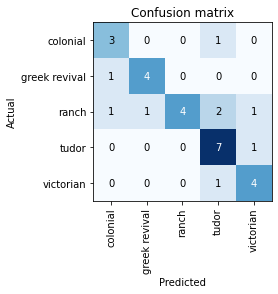

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

We can see that 9 houses were missclassified. 

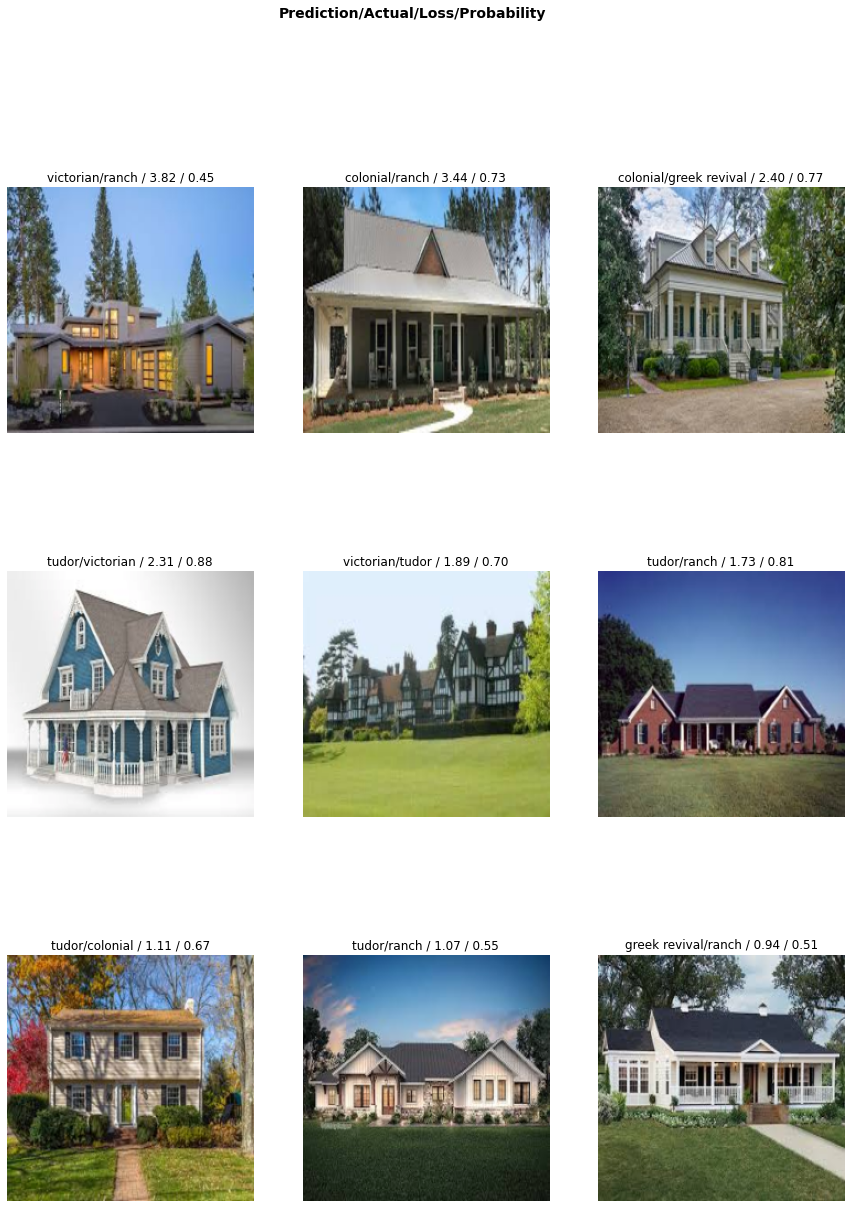

In [46]:
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

interp.plot_top_losses(9, figsize=(15,20))

This result was expected as architectural styles were adapting over time, and many houses combine elements of more than one design style. 

In [43]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      